# **Simple Pre-Processing of a single hindi comment**

---



---

Preprocessing is preparing data for analysis or machine learning. It involves cleaning, transforming, and organizing data, including tasks like handling missing values, scaling features, and creating new features.

In [2]:
import re

def preprocess_comment(comment):
    # Remove emojis and special characters
    comment = re.sub(r'[^\w\s]', '', comment)
    # Convert to lowercase
    comment = comment.lower()
    return comment

comment = "सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े"
preprocessed_comment = preprocess_comment(comment)
print(preprocessed_comment)

सरकर हमश स कसन क कमई क बढन क लए नईनई सकम लत रहत ह तक उन पर जयद आरथक बझ न पड


# LiHiSTO Library

---

---




Lihisto is a package with a comprehensive list of 820 Hindi Stopwords.

In [3]:
pip install LiHiSTO

Note: you may need to restart the kernel to use updated packages.


# Stopwords

---


---




Stop words are common words (such as "the", "is", "and", "in") that are often filtered out during text preprocessing to focus on the more meaningful words in natural language processing tasks.

In [4]:
from stopwords_hindi import hindi_sw
sw = hindi_sw.get_hindi_sw()
len(sw)

820

# **Performing all steps of pre-processing**

---



---



# Unidecode

---



Unidecode is a Python library for transliterating Unicode characters into ASCII characters.

In [5]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


# Indic-nlp-library

---

Indic NLP Library is a Python library for natural language processing tasks specific to the languages of the Indian subcontinent.



In [6]:
pip install indic-nlp-library

Note: you may need to restart the kernel to use updated packages.


# **Pre-processing using manual stopwords list**

---



---
Using nltk libraries and manual hindi stopwords  


In [7]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from indicnlp.tokenize import indic_tokenize
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
from unidecode import unidecode

factory = IndicNormalizerFactory()
normalizer = factory.get_normalizer("hi")

# Hindi stopwords list
hindi_stopwords = {"अ", "अत", "अपना", "अपनी", "अपने", "अभी", "आ", "इस", "इसका", "इसकी", "इसके", "इसमें", "इसे", "उन", "उनका", "उनकी", "उनके", "उनको", "उस", "उसके", "उसी", "उसे", "एक", "एस", "ऐसे", "ओर", "और", "कई", "कर", "किसी", "की", "के", "को", "गया", "जैसे", "तक", "तो", "था", "थी", "थे", "दो", "न", "नहीं", "ने", "पर", "पहले", "पूरा", "पे", "फिर", "मगर", "मे", "में", "या", "यह", "यहाँ", "यही", "रहा", "रहे", "लिए", "लिया", "लेकिन", "व", "वगेरह", "वाले", "वह", "वहाँ", "वहीं", "वाली", "सकता", "सकते", "सबसे", "से", "सो", "संग", "हि", "ही", "हुआ", "हुई", "हुए", "हो", "होता", "होती", "होते"}

nltk.download('punkt')

def preprocess_comment(comment):
    # Remove emojis
    comment = re.sub(r'[^\w\s]', '', comment)
    # Normalize text
    comment = normalizer.normalize(comment)
    # Tokenization
    tokens = indic_tokenize.trivial_tokenize(comment)
    # Remove stopwords
    tokens = [word for word in tokens if word not in hindi_stopwords]
    # Remove punctuation and digits
    tokens = [word for word in tokens if word not in string.punctuation and not word.isdigit()]
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Join tokens back to text
    preprocessed_comment = ' '.join(tokens)
    return preprocessed_comment

comment = "सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े"
preprocessed_comment = preprocess_comment(comment)
print(preprocessed_comment)
print('\n')

सरकर हमश स कसन क कमई क बढन क लए नईनई सकम लत रहत ह जयद आरथक बझ पड




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Pre-processing using a built-in library for stopwords list**

---



---



In [8]:
from stopwords_hindi import hindi_sw

factory = IndicNormalizerFactory()
normalizer = factory.get_normalizer("hi")

nltk.download('punkt')

def preprocess_comment(comment):
    # Remove emojis
    comment = re.sub(r'[^\w\s]', '', comment)
    # Normalize text
    comment = normalizer.normalize(comment)
    # Tokenization
    tokens = indic_tokenize.trivial_tokenize(comment)

    # Get Hindi stopwords from library
    stopwords = hindi_sw.get_hindi_sw()

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords]
    # Remove punctuation and digits
    tokens = [word for word in tokens if word not in string.punctuation and not word.isdigit()]
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Join tokens back to text
    preprocessed_comment = ' '.join(tokens)
    return preprocessed_comment

comment = "सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े"
preprocessed_comment = preprocess_comment(comment)
print(preprocessed_comment)
print('\n')

सरकर हमश कसन कमई बढन लए नईनई सकम लत रहत ह जयद आरथक बझ पड




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Upload the CSV File**


---



---
### Uploading the hindi comments file.


In [9]:
import pandas as pd
df = pd.read_csv("HindiComments.csv")


# **Pre-processing of Dataset**

---



---

Preprocessing comments involves cleaning text, splitting it into words, converting to lowercase, removing common words (stopwords), reducing words to their base form, handling negations/contractions, correcting typos, and encoding text for analysis.

Here we perform pre-processing steps like:


1.   Removing emojis
2.   Removing links
3.   Removing English words
4.   Remove Numeric values
5.   Normalize text (stemming, lemmatization, lowercasing, etc.)
6.   Tokenization



In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

factory = IndicNormalizerFactory()
normalizer = factory.get_normalizer("hi")
stopwords = hindi_sw.get_hindi_sw()

nltk.download('punkt')

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # Remove emojis
    text = re.sub(r'[^\w\s]', '', text)
    # Remove links starting with 'https'
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # Remove English words (assuming only Hindi text is desired)
    text = re.sub(r'[a-zA-Z]+', '', text)
    # Remove numeric values
    text = re.sub(r'\d+', '', text)
    # Normalize text
    text = normalizer.normalize(text)
    # Tokenization
    tokens = indic_tokenize.trivial_tokenize(text)

    # Get Hindi stopwords from library
    stopwords = hindi_sw.get_hindi_sw()

    # Remove stopwords and punctuation in one pass
    tokens = [word.lower() for word in tokens if word not in stopwords and word not in string.punctuation]
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Join tokens back to text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

sentiment_mapping = {
    'defamation': 1,
    'fake': 2,
    'hate': 3,
    'non-hostile': 4,
    'offensive': 5,
}

# Load the CSV file
df = pd.read_csv("HindiComments.csv")

# Apply preprocessing to the 'Post' column
df['Preprocessed_Post'] = df['Post'].apply(preprocess_text)

# Remove empty or NaN sentiments and replace them with "none"
df['Labels Set'] = df['Labels Set'].fillna("none")

# Label all comments with two sentiments together as 3
df['Label'] = df['Labels Set'].apply(lambda x: 3 if ',' in x else sentiment_mapping.get(x, 3))

# Save the preprocessed data to a new CSV file
df.to_csv("Preprocessed_HindiComments.csv", index=False)

print("Pre-processing done.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Pre-processing done.


# **Splitting the dataset into features and labels**

---



---

`Features:` These are the inputs or independent variables used to make predictions. They represent the characteristics or attributes of the data being analyzed. For example, in a spam email classifier, features could include word frequencies, email length, sender's address, etc.


`Labels:` Labels are the outputs or dependent variables that we want the model to predict based on the features. They represent the target variable we are trying to predict. Using the same example of a spam email classifier, the label would indicate whether an email is spam (1) or not spam (0).

In [11]:
# Check the first few rows of the dataset
print(df.head())

# Split the dataset into features (X) and labels (y)
X = df['Preprocessed_Post']
y = df['Label']


   Unique ID                                               Post  \
0          1  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...   
1          2  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...   
2          3  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...   
3          4  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...   
4          5  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...   

             Labels Set                                  Preprocessed_Post  \
0        hate,offensive  मर दश हनद बहत नरल ह कछ पकक रम भकत ह कछ बबर सल ...   
1           non-hostile  सरकर हमश कसन कमई बढन लए नईनई सकम लत रहत ह जयद ...   
2           non-hostile  सशत बजनस डल जन डल दपश सशत हतय दन ह कय यद आई दख...   
3  defamation,offensive  सल जएनय छप कमन लग हनदओ कहत ह सवधन सबक बरबर अधक...   
4           non-hostile  अनलक लए गइडलइनस जर\n\n सतबर दशभर मटर सव शर हग\...   

   Label  
0      3  
1      4  
2      4  
3      3  
4      4  


# **Class Distribution**

---



---

Class distribution is the spread of different categories within a dataset, showing how many instances belong to each class.

In [12]:
# Count the occurrences of each label
label_counts = df['Label'].value_counts()

# Print the label counts
print("Label Counts:")
print(label_counts)

Label Counts:
Label
4    4358
2    1442
3    1376
5     579
1     437
Name: count, dtype: int64


# **Visual Representation of labels per class**

---



---

The following bar graph represents the distribution of the various classes (defamation, fake, hate, non-hostile, offensive) present in the dataset.

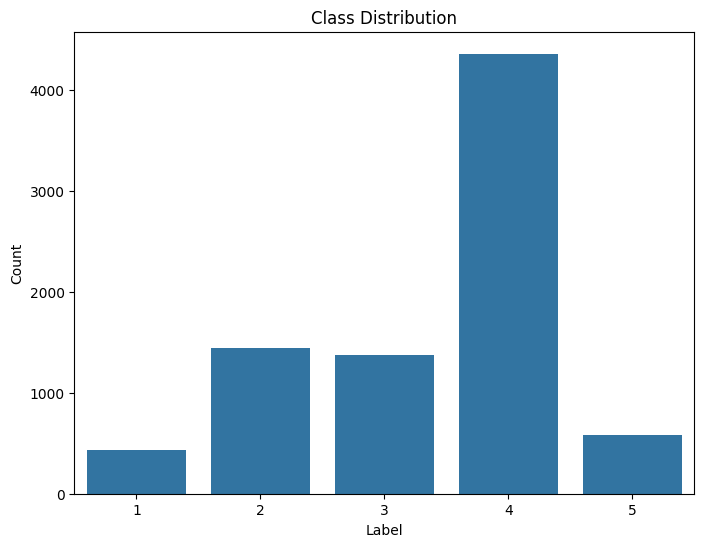

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Label')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# **Feature Extraction - TF-IDF and Train-Test Split**

---



---

TF-IDF measures word importance in a document collection. Train-test split divides data for training and testing machine learning models.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

data = pd.read_csv('Preprocessed_HindiComments.csv')

# Feature Extraction: TF-IDF
# vectorizer_tfidf = TfidfVectorizer()
# X_tfidf = vectorizer_tfidf.fit_transform(data['Preprocessed_Post'])
vectorizer_tfidf = TfidfVectorizer(
    max_features=10000,  # Limit features 
    min_df=2,            # Ignore terms that appear in less than 2 docs
    max_df=0.95,         # Ignore very common terms
    sublinear_tf=True    # Apply sublinear tf scaling
)
X_tfidf = vectorizer_tfidf.fit_transform(data['Preprocessed_Post'])
y = data['Label']

# Split data into train and test sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# **Model Evaluation**



---



---

Model evaluation assesses the performance of a machine learning model using metrics such as accuracy, precision, recall, and F1 score. It helps determine how well the model generalizes to new, unseen data and identifies areas for improvement.


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print results
print("Model Evaluation Results:")
for name, acc in results.items():
    print(f"{name}: Accuracy = {acc:.4f}")


Model Evaluation Results:
Logistic Regression: Accuracy = 0.6675
Multinomial Naive Bayes: Accuracy = 0.6272
Support Vector Machine: Accuracy = 0.6766
Random Forest: Accuracy = 0.6522
Gradient Boosting: Accuracy = 0.6254


# **Model Comparison Plot**

---



---
### Comparing different models on the basis of their accuracy


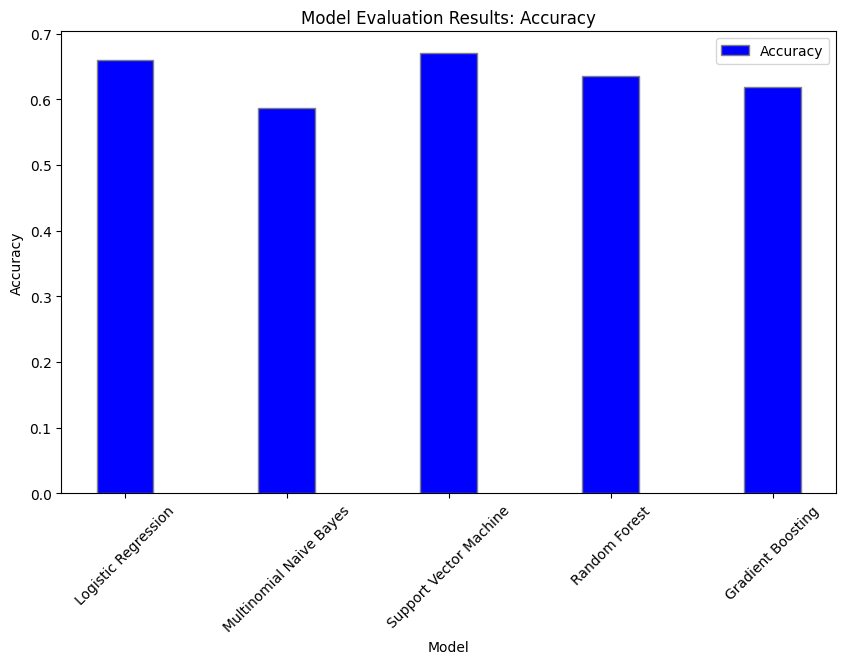

In [16]:
data = {
    'Model': ['Logistic Regression', 'Multinomial Naive Bayes', 'Support Vector Machine', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.6602, 0.5869, 0.6699, 0.6351, 0.6181]
}

df = pd.DataFrame(data)

bar_width = 0.35

r = range(len(df))

plt.figure(figsize=(10, 6))

plt.bar(r, df['Accuracy'], color='blue', width=bar_width, edgecolor='grey', label='Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Evaluation Results: Accuracy')
plt.xticks([r for r in range(len(df))], df['Model'], rotation=45)
plt.legend()

plt.show()

# **Hyperparameter Tuning of Logistic Regression**

---



---

Hyperparameter tuning of logistic regression involves optimizing parameters like regularization strength and penalty type to enhance the model's performance, typically through techniques like grid search or random search. This process aims to find the best combination of hyperparameters that minimizes prediction errors.








In [17]:
from sklearn.model_selection import GridSearchCV

# Load the preprocessed data
df = pd.read_csv("Preprocessed_HindiComments.csv")

# Split the data into features and labels
X = df['Preprocessed_Post']
y = df['Label']

tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Define the parameter grid for logistic regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1000, 2000, 3000],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

# Perform grid search cross-validation for Logistic Regression
# grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr = GridSearchCV(
    LogisticRegression(), 
    param_grid_lr, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1  # Parallel processing
)
grid_search_lr.fit(X_tfidf, y)

# Get best hyperparameters and best score for Logistic Regression
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best Parameters:", best_params_lr)
print("Best Score:", best_score_lr)


Best Parameters: {'C': 10, 'max_iter': 1000, 'solver': 'liblinear'}
Best Score: 0.7054430282618203


# **Prediction of the label on a random comment**

---



---



Predicting various classes (defamation, fake, hate, non-hostile, offensive) on the random comment

In [19]:
# Function to preprocess text
def preprocess_text(text):
    # Remove emojis
    text = re.sub(r'[^\w\s]', '', text)
    # Remove links starting with 'https'
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # Remove English words (assuming only Hindi text is desired)
    text = re.sub(r'[a-zA-Z]+', '', text)
    # Remove numeric values
    text = re.sub(r'\d+', '', text)
    # Normalize text
    text = normalizer.normalize(text)
    # Tokenization
    tokens = indic_tokenize.trivial_tokenize(text)

    # Get Hindi stopwords from library
    stopwords = hindi_sw.get_hindi_sw()

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords]
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Join tokens back to text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Define reverse mapping dictionary for labels
reverse_sentiment_mapping = {
    1: 'defamation',
    2: 'fake',
    3: 'hate',
    4: 'non-hostile',
    5: 'offensive',
    6: 'multiple'  # Label for comments with multiple sentiments
}

# Load the preprocessed data
df = pd.read_csv("Preprocessed_HindiComments.csv")

# Split the data into features and labels
X = df['Preprocessed_Post']
y = df['Label']

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train logistic regression model
# lr_model = LogisticRegression(max_iter=1000)
lr_model = LogisticRegression(
    C=1.0,              # From your grid search
    solver='liblinear', # Faster for classification
    max_iter=1000,
    n_jobs=-1           # Use all available cores
)
lr_model.fit(X_train, y_train)

# Load a new comment
new_comment = input("Enter the comment: ")

# Preprocess the new comment
preprocessed_new_comment = preprocess_text(new_comment)

# Transform the preprocessed comment using the TfidfVectorizer
X_new_comment = tfidf_vectorizer.transform([preprocessed_new_comment])

# Predict the label of the new comment
predicted_label_encoded = lr_model.predict(X_new_comment)
predicted_label_name = reverse_sentiment_mapping.get(predicted_label_encoded[0], 'unknown')

print("Predicted Label:", predicted_label_name)


c:\Users\HP\anaconda3\envs\torch_env\lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


Predicted Label: non-hostile
